In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import pivottablejs
import statsmodels
import json

In [3]:
plt.rcParams['image.cmap'] = 'magma'

In [4]:
mTurk = True

if mTurk:
    all_keys = ['c83-101_0A', 'c83-101_0B', 'c83-101_14A', 'c83-101_14B', 'c83-101_29A', 'c83-101_29B', 
                'c83-101_43A', 'c83-101_43B', 'c83-101_57A', 'c83-101_57B', 'c83-101_71A', 'c83-101_71B', 
                'c83-101_86A', 'c83-101_86B', 'c83-101_100A', 'c83-101_100B', 'c11-5_0A', 'c11-5_0B', 
                'c11-5_14A', 'c11-5_14B', 'c11-5_29A', 'c11-5_29B', 'c11-5_43A', 'c11-5_43B', 
                'c11-5_57A', 'c11-5_57B', 'c11-5_71A', 'c11-5_71B', 'c11-5_86A', 'c11-5_86B', 
                'c11-5_100A', 'c11-5_100B', 'c102-109_0A', 'c102-109_0B', 'c102-109_14A', 'c102-109_14B', 
                'c102-109_29A', 'c102-109_29B', 'c102-109_43A', 'c102-109_43B', 'c102-109_57A', 'c102-109_57B', 
                'c102-109_71A', 'c102-109_71B', 'c102-109_86A', 'c102-109_86B', 'c102-109_100A', 'c102-109_100B', 
                'c17-85_0A', 'c17-85_0B', 'c17-85_14A', 'c17-85_14B', 'c17-85_29A', 'c17-85_29B', 
                'c17-85_43A', 'c17-85_43B', 'c17-85_57A', 'c17-85_57B', 'c17-85_71A', 'c17-85_71B', 
                'c17-85_86A', 'c17-85_86B', 'c17-85_100A', 'c17-85_100B', 'c47-34_0A', 'c47-34_0B', 
                'c47-34_14A', 'c47-34_14B', 'c47-34_29A', 'c47-34_29B', 'c47-34_43A', 'c47-34_43B', 
                'c47-34_57A', 'c47-34_57B', 'c47-34_71A', 'c47-34_71B', 'c47-34_86A', 'c47-34_86B', 
                'c47-34_100A', 'c47-34_100B', 'c40-20_0A', 'c40-20_0B', 'c40-20_14A', 'c40-20_14B', 
                'c40-20_29A', 'c40-20_29B', 'c40-20_43A', 'c40-20_43B', 'c40-20_57A', 'c40-20_57B', 
                'c40-20_71A', 'c40-20_71B', 'c40-20_86A', 'c40-20_86B', 'c40-20_100A', 'c40-20_100B', 
                'c79-97_0A', 'c79-97_0B', 'c79-97_14A', 'c79-97_14B', 'c79-97_29A', 'c79-97_29B', 
                'c79-97_43A', 'c79-97_43B', 'c79-97_57A', 'c79-97_57B', 'c79-97_71A', 'c79-97_71B', 
                'c79-97_86A', 'c79-97_86B', 'c79-97_100A', 'c79-97_100B', 'c56-68_0A', 'c56-68_0B', 
                'c56-68_14A', 'c56-68_14B', 'c56-68_29A', 'c56-68_29B', 'c56-68_43A', 'c56-68_43B', 
                'c56-68_57A', 'c56-68_57B', 'c56-68_71A', 'c56-68_71B', 'c56-68_86A', 'c56-68_86B', 
                'c56-68_100A', 'c56-68_100B']
else:
    all_keys = ['l2-63_0A', 'l2-63_0B', 'l2-63_14A', 'l2-63_14B', 'l2-63_29A', 'l2-63_29B', 'l2-63_43A', 
                'l2-63_43B', 'l2-63_57A', 'l2-63_57B', 'l2-63_71A', 'l2-63_71B', 'l2-63_86A', 'l2-63_86B', 
                'l2-63_100A', 'l2-63_100B', 'l62-58_0A', 'l62-58_0B', 'l62-58_14A', 'l62-58_14B', 
                'l62-58_29A', 'l62-58_29B', 'l62-58_43A', 'l62-58_43B', 'l62-58_57A', 'l62-58_57B', 
                'l62-58_71A', 'l62-58_71B', 'l62-58_86A', 'l62-58_86B', 'l62-58_100A', 'l62-58_100B', 
                'l3-61_0A', 'l3-61_0B', 'l3-61_14A', 'l3-61_14B', 'l3-61_29A', 'l3-61_29B', 'l3-61_43A', 
                'l3-61_43B', 'l3-61_57A', 'l3-61_57B', 'l3-61_71A', 'l3-61_71B', 'l3-61_86A', 'l3-61_86B', 
                'l3-61_100A', 'l3-61_100B', 'l53-57_0A', 'l53-57_0B', 'l53-57_14A', 'l53-57_14B', 
                'l53-57_29A', 'l53-57_29B', 'l53-57_43A', 'l53-57_43B', 'l53-57_57A', 'l53-57_57B', 
                'l53-57_71A', 'l53-57_71B', 'l53-57_86A', 'l53-57_86B', 'l53-57_100A', 'l53-57_100B', 
                'l30-24_0A', 'l30-24_0B', 'l30-24_14A', 'l30-24_14B', 'l30-24_29A', 'l30-24_29B', 
                'l30-24_43A', 'l30-24_43B', 'l30-24_57A', 'l30-24_57B', 'l30-24_71A', 'l30-24_71B', 
                'l30-24_86A', 'l30-24_86B', 'l30-24_100A', 'l30-24_100B', 'l12-14_0A', 'l12-14_0B', 
                'l12-14_14A', 'l12-14_14B', 'l12-14_29A', 'l12-14_29B', 'l12-14_43A', 'l12-14_43B', 
                'l12-14_57A', 'l12-14_57B', 'l12-14_71A', 'l12-14_71B', 'l12-14_86A', 'l12-14_86B', 
                'l12-14_100A', 'l12-14_100B', 'l59-23_0A', 'l59-23_0B', 'l59-23_14A', 'l59-23_14B', 
                'l59-23_29A', 'l59-23_29B', 'l59-23_43A', 'l59-23_43B', 'l59-23_57A', 'l59-23_57B', 
                'l59-23_71A', 'l59-23_71B', 'l59-23_86A', 'l59-23_86B', 'l59-23_100A', 'l59-23_100B', 
                'l32-9_0A', 'l32-9_0B', 'l32-9_14A', 'l32-9_14B', 'l32-9_29A', 'l32-9_29B', 'l32-9_43A', 
                'l32-9_43B', 'l32-9_57A', 'l32-9_57B', 'l32-9_71A', 'l32-9_71B', 'l32-9_86A', 'l32-9_86B', 
                'l32-9_100A', 'l32-9_100B']

In [5]:
# Given an item and a given trials dictionary, retrieve the x and y coordinates

def retrieve_coords(coord_dict,item):
    coords = str(coord_dict[item])
    coords = coords.replace("'", "")
    coords = coords.replace(", ", ",")
    x = int(coords.split(',')[0])
    y = int(coords.split(',')[1])
    return x, y

# Given a dictionary, return the keys (all items present in the dict)

def retrieve_keys(coord_dict):
    out_keys = list(coord_dict.keys())
    return sorted(out_keys)

# Given a dictionary and two critical items, compute the euclidian distance

def compute_dist(coord_dict, item1, item2):
    x1, y1 = retrieve_coords(coord_dict, item1)
    x2, y2 = retrieve_coords(coord_dict, item2)
    dist = np.sqrt(np.square(x1-x2)+np.square(y1-y2))
    return dist

# Create an n by n pandas dataframe, where n is the total number of keys. If full=None, its blank
# if full=df, where df is a given dataframe, it will populate it with the values.
# This is useful for switching to np.array and back

def create_mat(full_keys, full=None):
    dist_mat = pd.DataFrame(data=full, index=full_keys, columns=full_keys)
    return dist_mat

# Given a pandas dataframe, two items, and a distance between them, this function places the distance appropriately

def place_dist(fillable_mat, item1, item2, dist):
    fillable_mat.loc[item1,item2] = dist
    fillable_mat.loc[item2,item1] = dist
    #return fillable_mat

# Pull a particular distance given a matrix and a pair of items    

def pull_dist(fillable_mat, item1, item2):
    out_dist = fillable_mat.loc[item1,item2]
    return out_dist

# Once pd dataframes have been turned into arrays, this compiles them and computes the mean across 3rd dimension
# This is because we will have multiple trials, where some have distances for a particular pair and other's don't
# If standard, it will standardize the subjects' distances wrt their own judgments


def std_array(in_array):
    array = np.array(in_array, np.float64)
    out_array = (array - np.nanmean(array)) / np.nanstd(array)
    return out_array
    


def nan_mean(arrays, standard=False):
    all_arrs = np.dstack(arrays)
    if standard:
        all_arrs = (all_arrs - np.nanmean(all_arrs)) / np.nanstd(all_arrs)
    avg_arr = np.nanmean(all_arrs, axis=2)
    return avg_arr    

In [38]:
# Preprocess data
# read in the data file, then loop through each line (which should be a single subject)
# take the first item from each line as the subject, then the third item on as the trialwise data
# Find the index where each trial number starts (crit_ind)
# Use this to loop through and parse the rt and dictionary
# A bunch of ugly code to make the dictionary json readable
# Maintain equal dim lists of subject, trial number, rt, dictionary


datafile = open('MTurkBatch2/testData.txt')
# datafile = open('myData3.txt')
sub_array = []
qual_array = []
trial_nums = []
times = []
dicts = []
for line in datafile:
    qual_code = line.split(',')[0]
    turk_code = line.split(',')[1]
    trials = np.array(line.split(',')[3:])
    # qual_code = 'NA'
    # turk_code = line.split(',')[0]
    # trials = np.array(line.split(',')[2:])
    ntrials = line.count('{')
    crit_inds=[]
    for i in range(1,ntrials+1):
        crit = np.in1d(trials, str(i))
        crit_ind = [ind for ind in range(len(trials)) if crit[ind]==True][0]
        crit_inds.append(crit_ind)
    for i in range(len(crit_inds)):
        ind = crit_inds[i]
        trial_num = i
        time = trials[ind+1]
        if i < len(crit_inds)-1:
            next_ind = crit_inds[i+1]
            loc_dict = str(trials[ind+2:next_ind]).split('{')[-1]
        else:
            loc_dict = str(trials[ind+2:]).split('{')[-1]
        loc_dict = str(loc_dict).split('}')[0]
        loc_dict = '{' + loc_dict + '}'
        loc_dict = loc_dict.replace("\n", "")
        loc_dict = loc_dict.replace("' '", "', '")
        loc_dict = loc_dict.replace("'", "")
        loc_dict = json.loads(loc_dict)
        sub_array.append(turk_code)
        qual_array.append(qual_code)
        trial_nums.append(trial_num)
        times.append(time)
        dicts.append(loc_dict)
sub_array = np.array(sub_array)
qual_array = np.array(qual_array)
trial_nums = np.array(trial_nums)
times = np.array(times)
dicts = np.array(dicts)

In [60]:
# Write the lists derived above into a pandas array that's more human readable

data_full = pd.DataFrame(np.transpose(np.vstack((qual_array, sub_array, trial_nums, times, dicts))), 
                         columns=['qual','sub','trial','time','coords'])
rts = np.array(data_full.loc[:,'time'], dtype=np.int64)
rts = rts[:]
rts = rts/1000/60
print(len(rts)/13)
print(np.mean(rts))
print(data_full)


23.23076923076923
2.21272483444
           qual       sub trial    time  \
0    3190390109  rkZHicEz     0  300009   
1    3190390109  rkZHicEz     1  300005   
2    3190390109  rkZHicEz     2  239042   
3    3190390109  rkZHicEz     3  245064   
4    3190390109  rkZHicEz     4  246897   
5    3190390109  rkZHicEz     5  273538   
6    3190390109  rkZHicEz     6  203268   
7    3190390109  rkZHicEz     7  269886   
8    3190390109  rkZHicEz     8  190342   
9    3190390109  rkZHicEz     9  274943   
10   3190390109  rkZHicEz    10  173414   
11   3190390109  rkZHicEz    11  164215   
12   3190390109  rkZHicEz    12  158064   
13   4544009100  5kwO4weo     0  181525   
14   4544009100  5kwO4weo     1  285954   
15   4544009100  5kwO4weo     2  119692   
16   4544009100  5kwO4weo     3   89845   
17   4544009100  5kwO4weo     4   86506   
18   4544009100  5kwO4weo     5   88721   
19   4544009100  5kwO4weo     6  107219   
20   4544009100  5kwO4weo     7  111889   
21   4544009100  5kwO4

In [40]:
# To produce all the keys

nums = [0, 14, 29, 43, 57, 71, 86, 100]

# low level
# filter_pairs = [(2, 63), (62, 58),  (3, 61), (53, 57), (30, 24), (12, 14), (59, 23), (32, 9)]
filter_pairs = [(83, 101), (11, 5), (102, 109), (17, 85), (47, 34), (40, 20), (79, 97), (56, 68)]

fnames = []
for chan_pair in range(len(nums)):
    chan1, chan2 = filter_pairs[chan_pair]
    for pairing in range(len(nums)):
        labeler = nums[pairing]
        # A = str('Pilot_Pairs/l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A.png')
        # B = str('Pilot_Pairs/l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B.png')
        A = str('Pilot_Pairs/c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A.png')
        B = str('Pilot_Pairs/c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B.png')
        fnames.append(A)
        fnames.append(B)
    
# fnames is the whole list

In [62]:
all_data = []
subjects = np.unique(data_full['sub'])
for subject in subjects:
    arrays = []
    sub_data = data_full[data_full['sub']==subject]
    sub_trials = sub_data.shape[0]
    print("subject {}, completed {} trials".format(subject,sub_trials))
    for trial in range(sub_trials):
        new_arr = create_mat(all_keys, full=None)
        coord_dict = sub_data.loc[sub_data['trial'] == trial, 'coords'].iloc[0]
        key = retrieve_keys(coord_dict)
        for i in key:
            if i in all_keys:
                for j in key:
                    if j in all_keys:
                        dist_measure = compute_dist(coord_dict, i, j)
                        place_dist(new_arr, i, j, dist_measure)
        new_arr = std_array(new_arr)
        arrays.append(np.array(new_arr))
    arrays = np.array(arrays, np.float64)
    countingthinger = np.count_nonzero(~np.isnan(arrays), axis=0)
    countingthinger2 = create_mat(all_keys, full=countingthinger)
    do_mean = nan_mean(arrays, standard=False)
    sub_avg = create_mat(all_keys, full=do_mean)
    all_data.append(np.array(do_mean))
all_data = np.array(all_data, np.float64)
all_count = np.count_nonzero(~np.isnan(all_data), axis=0)
all_mean = nan_mean(all_data, standard=False)
all_counts = create_mat(all_keys, full=all_count)
all_subs = create_mat(all_keys, full=all_mean)
print('done')


subject 26HoFBT4, completed 28 trials


/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice


subject 5kwO4weo, completed 40 trials
subject AXDCQR6E, completed 28 trials


/Users/jeffwammes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


subject EXwhbcaC, completed 27 trials
subject IH3K3lgQ, completed 27 trials
subject OaCBeF8q, completed 33 trials
subject TkIYdL80, completed 19 trials
subject UCM5FuiH, completed 12 trials
subject Uq8zyP1y, completed 15 trials
subject ZdlkCf8d, completed 32 trials
subject gy0VqVzP, completed 12 trials
subject rJUtvI9X, completed 16 trials
subject rkZHicEz, completed 13 trials
done


Full negative distance matrix of all images, we only really care about the big blocks on the diagonal where we specifrically set parameters.

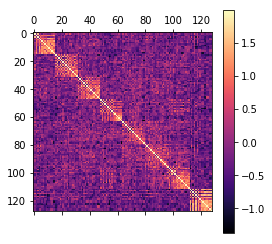

In [42]:
plt.clf()
plt.figure()
im = plt.matshow(all_mean*-1)
plt.colorbar(im)
plt.show()

These are the images that we actually set the values for

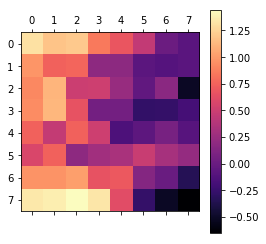

ACROSS THE TOP: 0 is the most dissimilar (by the model), and 7 is the most similar
DOWN THE SIDE: The numbers are meaningless, its simply the different sets of endpoints


In [43]:
nums = [0, 14, 29, 43, 57, 71, 86, 100]
filter_pairs = [(2, 63), (62, 58),  (3, 61), (53, 57), (30, 24), (12, 14), (59, 23), (32, 9)]
filter_pairs = [(83, 101), (11, 5), (102, 109), (17, 85), (47, 34), (40, 20), (79, 97), (56, 68)]

all_outs = []
for chan_pair in range(len(nums)):
    chan1, chan2 = filter_pairs[chan_pair]
    outs = []
    for pairing in range(len(nums)):
        labeler = nums[pairing]
        # A = str('l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A')
        # B = str('l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B')
        A = str('c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A')
        B = str('c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B')
        output = pull_dist(all_subs, A, B)
        outs.append(output)
    outs = outs[::-1]
    all_outs.append(outs)
all_outs = np.array(all_outs)
all_outs = all_outs*-1

plt.clf()
im = plt.matshow(all_outs)
plt.colorbar(im)
plt.show()

print('ACROSS THE TOP: 0 is the most dissimilar (by the model), and 7 is the most similar')
print('DOWN THE SIDE: The numbers are meaningless, its simply the different sets of endpoints')

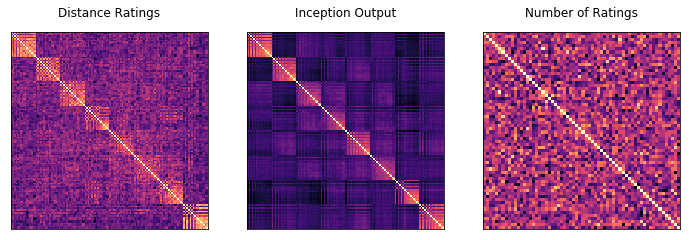

CORRELATION BETWEEN FULL INCEPTION STRUCTURE AND DISTANCE RATING STRUCTURE: 0.63


In [44]:
import pickle
# layer = 'conv2d1'
layer = 'mixed4e'
def open_dict(fname):
    with open(fname + '.pkl', 'rb') as reader:
        return pickle.load(reader)
    
#corrs = open_dict('corrs')
#corrs = open_dict('low'+str(layer))
corrs = open_dict(layer)
plt.clf()
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))
im1 = ax1.matshow(-all_mean)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax1.set_title('Distance Ratings')

im2 = ax2.matshow(corrs)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.set_title('Inception Output')

im3 = ax3.matshow(all_counts)
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.set_title('Number of Ratings')
plt.show()

corrs.shape
all_mean.shape

flat_corrs = corrs.flatten()
flat_means = all_mean.flatten()

all_corr_pile = pd.DataFrame(np.transpose(np.vstack((flat_corrs, flat_means))))
all_corr = all_corr_pile.corr()

full_mat_corr = -np.round(np.array(all_corr)[0,1],2)
print('CORRELATION BETWEEN FULL INCEPTION STRUCTURE AND DISTANCE RATING STRUCTURE: {}'.format(full_mat_corr))

In [45]:
all_spreads = []
spreads = np.empty((0, 8), float)
for i in range(0,128,16):
    spread = []
    subarray = corrs[i:i+16,i:i+16]
    for xy in range(0,16,2):
        spread.append(subarray[(xy),(xy+1)])
    spread = spread[::-1]
    spread = np.expand_dims(np.array(spread),axis=0)
    spreads = np.concatenate((spreads, spread))

In [46]:
aims = np.array([0,0.14,0.28,0.43,0.57,0.71,0.86,1])
aims = aims[::-1]
#aims = np.array([0.25]*8)
aims = np.vstack((aims, aims, aims, aims, aims, aims, aims, aims))
aims.shape

(8, 8)

EVALUATING BEHAVIORAL SORTING IN PILOT SUBJECTS, n = 13


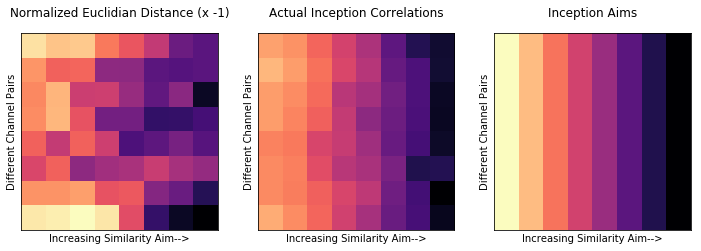

CORRELATION BETWEEN BEHAVIORAL SORTING AND ACTUAL INCEPTION STRUCTURE: 0.837


COMPARING ACROSS MATRICES
----------------------------------------------
From left to right:
Do distance measures for all pairs track the model structure?
The same, but collapsed across possible axes (different images, same parameter aims)
Does Inception produce what we want it to?
Do distance measures for all pairs track our intitial aims?
----------------------------------------------


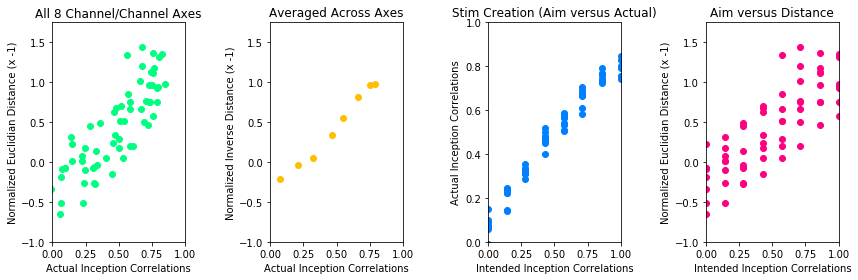

CORRELATION BETWEEN INTENDED INCEPTION STRUCTURE AND BEHAVIORAL SORTING: 0.817
CORRELATION BETWEEN INTENDED INCEPTION STRUCTURE AND ACTUAL INCEPTION STRUCTURE: 0.983


In [75]:
spear = False
print('EVALUATING BEHAVIORAL SORTING IN PILOT SUBJECTS, n = {}'.format(len(subjects)))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
im1 = ax1.matshow(all_outs)
im2 = ax2.matshow(spreads, vmin = 0, vmax = 1)
im3 = ax3.matshow(aims, vmin = 0, vmax = 1)
ax1.set_xlabel('Increasing Similarity Aim-->')
ax1.set_ylabel('Different Channel Pairs')
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax1.set_title('Normalized Euclidian Distance (x -1)')
ax2.set_xlabel('Increasing Similarity Aim-->')
ax2.set_ylabel('Different Channel Pairs')
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.set_title('Actual Inception Correlations')
ax3.set_xlabel('Increasing Similarity Aim-->')
ax3.set_ylabel('Different Channel Pairs')
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.set_title('Inception Aims')
plt.show()
plt.clf()

coll_outs = np.mean(all_outs, axis=0)
coll_spreads = np.mean(spreads, axis=0)


flat_outs = all_outs.flatten()
flat_spreads = spreads.flatten()
flat_aims = aims.flatten()

cross_domain = np.round(np.corrcoef(flat_outs,flat_spreads)[0,1],3)
if spear:
    cross_domain = np.round(scipy.stats.spearmanr(flat_outs,flat_spreads)[0],3)
print('CORRELATION BETWEEN BEHAVIORAL SORTING AND ACTUAL INCEPTION STRUCTURE: {}'.format(cross_domain))


print()
print()
print('COMPARING ACROSS MATRICES')
print('----------------------------------------------')
print('From left to right:')
print('Do distance measures for all pairs track the model structure?')
print('The same, but collapsed across possible axes (different images, same parameter aims)')
print('Does Inception produce what we want it to?')
print('Do distance measures for all pairs track our intitial aims?')
print('----------------------------------------------')




fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (12,4))
ax1.scatter(flat_spreads,flat_outs, c=(0,1,0.5))
ax1.set_title('All 8 Channel/Channel Axes')
ax1.set_xlabel('Actual Inception Correlations')
ax1.set_ylabel('Normalized Euclidian Distance (x -1)')
ax1.set_xlim([0, 1])
ax1.set_ylim([-1, 1.75])
ax2.scatter(coll_spreads,coll_outs, c=(1,0.75,0))
ax2.set_title('Averaged Across Axes')
ax2.set_xlabel('Actual Inception Correlations')
ax2.set_ylabel('Normalized Inverse Distance (x -1)')
ax2.set_xlim([0, 1])
ax2.set_ylim([-1, 1.75])
ax3.scatter(flat_aims,flat_spreads, c=(0,0.5,1))
ax3.set_title('Stim Creation (Aim versus Actual)')
ax3.set_xlabel('Intended Inception Correlations')
ax3.set_ylabel('Actual Inception Correlations')
ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax4.scatter(flat_aims,flat_outs, c=(1,0,0.5))
ax4.set_title('Aim versus Distance')
ax4.set_xlabel('Intended Inception Correlations')
ax4.set_ylabel('Normalized Euclidian Distance (x -1)')
ax4.set_xlim([0, 1])
ax4.set_ylim([-1, 1.75])
plt.tight_layout()
plt.show()
plt.clf()

aim_sort = np.round(np.corrcoef(flat_outs,flat_aims)[0,1],3)
qual_sort = np.round(np.corrcoef(flat_aims,flat_spreads)[0,1],3)
if spear:
    aim_sort = np.round(scipy.stats.spearmanr(flat_outs,flat_aims)[0],3)
    qual_sort = np.round(scipy.stats.spearmanr(flat_aims,flat_spreads)[0],3)
print('CORRELATION BETWEEN INTENDED INCEPTION STRUCTURE AND BEHAVIORAL SORTING: {}'.format(aim_sort))
print('CORRELATION BETWEEN INTENDED INCEPTION STRUCTURE AND ACTUAL INCEPTION STRUCTURE: {}'.format(qual_sort))

In [48]:
print(all_data.shape)

(13, 128, 128)


In [99]:
nums = [0, 14, 29, 43, 57, 71, 86, 100]
#filter_pairs = [(2, 63), (62, 58),  (3, 61), (53, 57), (30, 24), (12, 14), (59, 23), (32, 9)]

filter_pairs = [(83, 101), (11, 5), (102, 109), (17, 85), (47, 34), (40, 20), (79, 97), (56, 68)]


derp_keys = ['0', '14', '29', '43', '57', '71', '86', '100']

substack = []
for i in range(all_data.shape[0]):
    trim = all_data[i,:,:]
    trim = create_mat(all_keys, full=trim)
    each_sub = []
    for chan_pair in range(len(nums)):
        chan1, chan2 = filter_pairs[chan_pair]
        outs = []
        for pairing in range(len(nums)):
            labeler = nums[pairing]
            # A = str('l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A')
            # B = str('l' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B')
            A = str('c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'A')
            B = str('c' + str(chan1)+'-'+str(chan2)+'_'+str(labeler)+'B')
            output = pull_dist(trim, A, B)
            outs.append(output)
        each_sub.append(outs)
    each_sub = np.array(each_sub)
    outtt = create_mat(derp_keys, full=each_sub)
    outtt.to_csv('subject_'+str(i)+'.csv')
    flat_sub = each_sub.flatten()
    substack.append(flat_sub)
substack = np.array(substack)
    

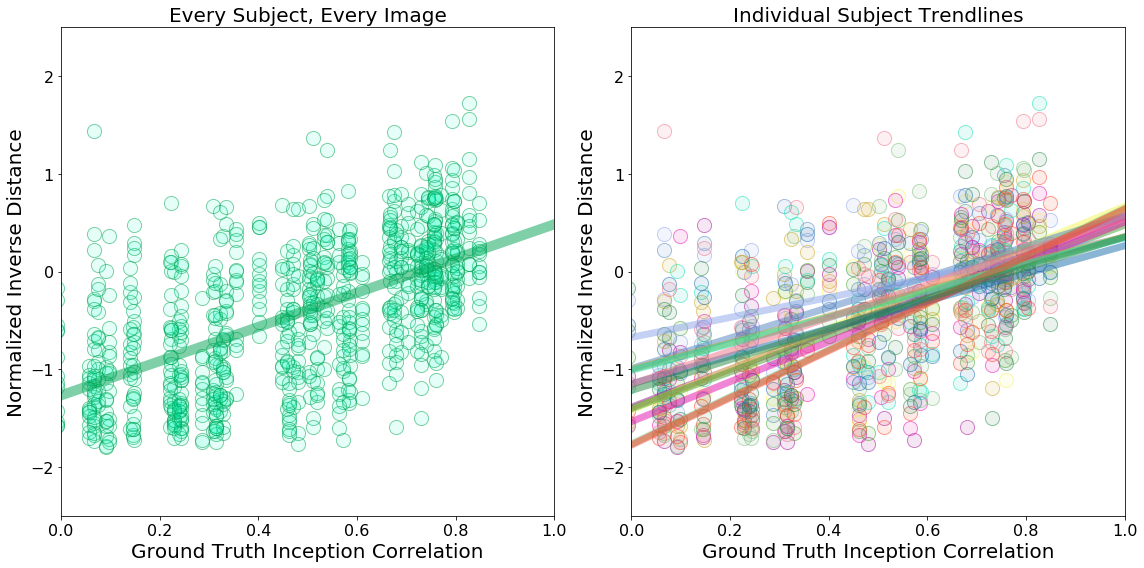

ALL SUBJECTS AND POINTS CORRELATION: 0.59, AVERAGE INTER-RATER CORRELATION: 0.51


In [98]:
derp = spreads.flatten()
derp = np.expand_dims(derp,0)
derps = np.tile(derp,(len(subjects),1))
colors = [[0.294,0.608,0.478,0.1],[0.792,0.404,0.153,0.1],
          [0.455,0.439,0.682,0.1],[0.831,0.239,0.533,0.1],
          [0.459,0.643,0.227,0.1],[0.867,0.678,0.231,0.1],
          [0.62,0.471,0.192,0.1],[0.4,0.4,0.4,0.1]]*2

add = [0,0,0,0.4]

all_ratings = substack.flatten()
all_incepts = derps.flatten()
all_all = pd.DataFrame(np.transpose(np.vstack((all_ratings, all_incepts))))
all_all = all_all.corr()

substack2 = pd.DataFrame(np.transpose(substack))
substack3 = substack2.corr()
if spear:
    substack3 = np.array(scipy.stats.spearmanr(substack2))[0]
summ = 0
lenn = 0
for i in range(1,9):
    interim = np.diag(np.array(substack3), k=i)
    summ += np.sum(interim)
    lenn += interim.shape[0]
inter_rater = summ / lenn



idx = np.isfinite(all_incepts) & np.isfinite(all_ratings)
trendline = np.polyfit(all_incepts[idx], all_ratings[idx], 1)


trend_x = np.linspace(0.0, 1.0, num=20)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax1.scatter(all_incepts,all_ratings, s = 200, c=(0,1,0.75,0.1), edgecolors=(0,0.64,0.32,0.5))
ax1.plot(trend_x, trendline[0] * trend_x + trendline[1], c = (0,0.64,0.32,0.5), linewidth=10)
ax1.set_title('Every Subject, Every Image', fontsize=20)
ax1.set_xlabel('Ground Truth Inception Correlation', fontsize=20)
ax1.set_ylabel('Normalized Inverse Distance', fontsize=20)
ax1.set_xlim([0, 1])
ax1.set_ylim([-2.5, 2.5])
for i in range(len(subjects)):
    col = np.append(np.random.random(3),0.1)
    ax2.scatter(derps[0],substack[i], s = 200, c=col, edgecolors=np.add(col, add))
    idx = np.isfinite(derps[0]) & np.isfinite(substack[i])
    trendline = np.polyfit(derps[0][idx], substack[i][idx], 1)
    ax2.plot(trend_x, trendline[0] * trend_x + trendline[1], c = np.add(col, add), linewidth=7)
ax2.set_title('Individual Subject Trendlines', fontsize=20)
ax2.set_xlabel('Ground Truth Inception Correlation', fontsize=20)
ax2.set_ylabel('Normalized Inverse Distance', fontsize=20)
ax2.set_xlim([0, 1])
ax2.set_ylim([-2.5, 2.5])
plt.tight_layout()
plt.show()



print('ALL SUBJECTS AND POINTS CORRELATION: {}, AVERAGE INTER-RATER CORRELATION: {}'.format(np.round(np.array(all_all)[0,1],2), np.round(inter_rater,2)))
      

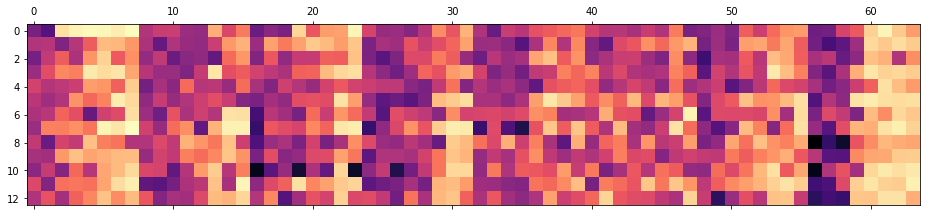

In [53]:
plt.matshow(-substack)
plt.show()

In [54]:
fnames

['Pilot_Pairs/c83-101_0A.png',
 'Pilot_Pairs/c83-101_0B.png',
 'Pilot_Pairs/c83-101_14A.png',
 'Pilot_Pairs/c83-101_14B.png',
 'Pilot_Pairs/c83-101_29A.png',
 'Pilot_Pairs/c83-101_29B.png',
 'Pilot_Pairs/c83-101_43A.png',
 'Pilot_Pairs/c83-101_43B.png',
 'Pilot_Pairs/c83-101_57A.png',
 'Pilot_Pairs/c83-101_57B.png',
 'Pilot_Pairs/c83-101_71A.png',
 'Pilot_Pairs/c83-101_71B.png',
 'Pilot_Pairs/c83-101_86A.png',
 'Pilot_Pairs/c83-101_86B.png',
 'Pilot_Pairs/c83-101_100A.png',
 'Pilot_Pairs/c83-101_100B.png',
 'Pilot_Pairs/c11-5_0A.png',
 'Pilot_Pairs/c11-5_0B.png',
 'Pilot_Pairs/c11-5_14A.png',
 'Pilot_Pairs/c11-5_14B.png',
 'Pilot_Pairs/c11-5_29A.png',
 'Pilot_Pairs/c11-5_29B.png',
 'Pilot_Pairs/c11-5_43A.png',
 'Pilot_Pairs/c11-5_43B.png',
 'Pilot_Pairs/c11-5_57A.png',
 'Pilot_Pairs/c11-5_57B.png',
 'Pilot_Pairs/c11-5_71A.png',
 'Pilot_Pairs/c11-5_71B.png',
 'Pilot_Pairs/c11-5_86A.png',
 'Pilot_Pairs/c11-5_86B.png',
 'Pilot_Pairs/c11-5_100A.png',
 'Pilot_Pairs/c11-5_100B.png',
 'Pilot_

In [55]:
maxxx = (np.amax(all_outs))
minnn = (np.amin(all_outs))
diffff = maxxx - minnn
steppp = diffff / 7
diff = minnn + (5*steppp)
print(minnn)
print(diff)
print(all_outs[:,2])

-0.655152546467
0.84165001657
[ 1.20453111  0.76906067  0.5018699   0.67046314  0.7464987   0.19614639
  1.019226    1.44037104]


In [90]:
cherry = np.array([all_outs[0,0], all_outs[2,1], all_outs[1,2], all_outs[6,3], 
          all_outs[5,4], all_outs[4,5], all_outs[3,6], all_outs[7,7]])
channnns = [(83, 101), (11, 5), (102, 109), (17, 85), (47, 34), (40, 20), (79, 97), (56, 68)]

(8,)


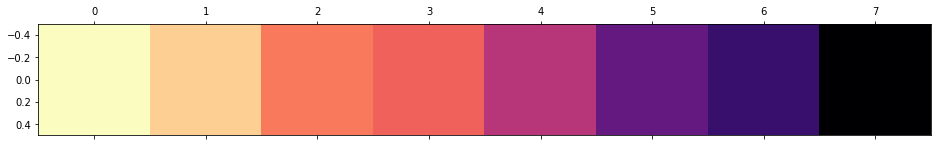

In [91]:
print(cherry.shape)
cherry = np.expand_dims(cherry,0)
plt.matshow(cherry)
plt.show()
plt.clf()

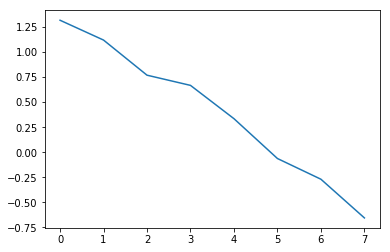

array([[ 1.31728424,  1.11954535,  0.76906067,  0.6673123 ,  0.33499102,
        -0.0624714 , -0.26911191, -0.65515255]])

In [96]:
plt.clf()
plt.plot(cherry[0])
plt.show()
cherry

In [58]:
np.around(all_outs,2)

array([[ 1.32,  1.18,  1.2 ,  0.86,  0.68,  0.45,  0.01, -0.08],
       [ 0.98,  0.75,  0.77,  0.2 ,  0.18, -0.07, -0.1 , -0.08],
       [ 0.92,  1.12,  0.5 ,  0.52,  0.24, -0.03,  0.18, -0.51],
       [ 0.94,  1.12,  0.67,  0.05,  0.05, -0.27, -0.27, -0.18],
       [ 0.75,  0.46,  0.75,  0.51, -0.15, -0.06,  0.08, -0.09],
       [ 0.58,  0.75,  0.2 ,  0.29,  0.33,  0.48,  0.31,  0.23],
       [ 0.97,  0.97,  1.02,  0.67,  0.7 ,  0.14,  0.01, -0.34],
       [ 1.35,  1.37,  1.44,  1.34,  0.63, -0.26, -0.51, -0.66]])

In [86]:
max = 1.35
min = -0.66
diff = (max-min)/7
ideal=[1.32]
x = max
for i in range(8):
    y = x - diff
    ideal.append(y)
    x = y
print(np.around(ideal,2))
    
    

[ 1.32  1.06  0.78  0.49  0.2  -0.09 -0.37 -0.66 -0.95]
